## Explore Exercise

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import acquire, prepare

### Explore Item

In [130]:
#acquire data
sales = acquire.get_sales_data()

In [131]:
#prepare data
sales = prepare.prep_sales_data(sales)

In [132]:
sales.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_total,month,day_of_week
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,10.92,1,Tuesday
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,218.40,1,Tuesday


In [133]:
#check number of observations
sales.shape

(913000, 16)

In [134]:
# confirm each represents unique date
sales.shape

(913000, 16)

In [135]:
#Splitting the data - 70% to train 
train_size = .70

# find n, the number of rows in df
n = sales.shape[0]
test_start_index = round(train_size * n)

#splitting first 70% to train, remainder to test
train = sales[:test_start_index] # everything up (not including) to the test_start_index
test = sales[test_start_index:] # everything from the test_start_index to the end

train.shape, test.shape

((639100, 16), (273900, 16))

In [136]:
train.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_total,month,day_of_week
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,10.92,1,Tuesday
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,218.40,1,Tuesday


In [137]:
# split target to y (y-train)
y = train.sale_total
y.head(2)

sale_date
2013-01-01 00:00:00+00:00     10.92
2013-01-01 00:00:00+00:00    218.40
Name: sale_total, dtype: float64

In [138]:
y.shape

(639100,)

### Check distribution of target variable (total_sales)

In [139]:
y.describe()

count    639100.000000
mean        265.689208
std         214.904796
min           0.000000
25%          93.000000
50%         220.080000
75%         380.600000
max        1785.560000
Name: sale_total, dtype: float64

### Takeaways from train
Average Daily sales totals:
- mean $266 <br>

- min $0 <br>
- median $220
- max $1786 <br>


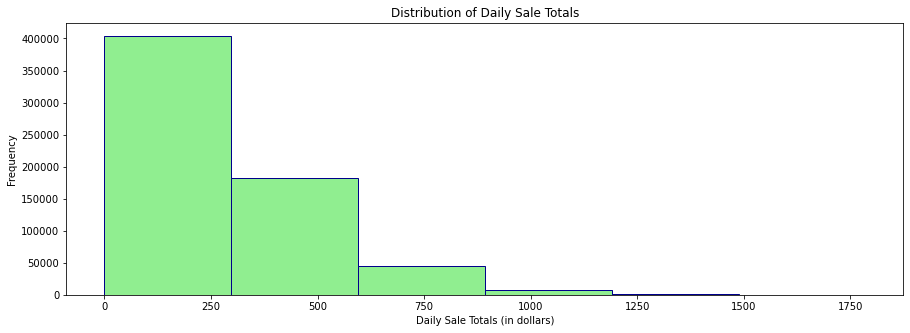

In [140]:
#look at distribution of our target variable
plt.figure(figsize=(15, 5))
y.plot.hist(bins = 6, color = 'lightgreen', edgecolor = 'darkblue')
plt.xlabel('Daily Sale Totals (in dollars)')
plt.title('Distribution of Daily Sale Totals')
plt.show()

#### Takeaways
- Majority of sale totals are below $300<br>
- Right skew


### Explore Sales on Different Components of Time

In [141]:
y.groupby(y.index.month).mean().describe()

count     12.000000
mean     266.306559
std       50.125481
min      185.232810
25%      236.271200
50%      275.864879
75%      300.474299
max      334.285921
Name: sale_total, dtype: float64

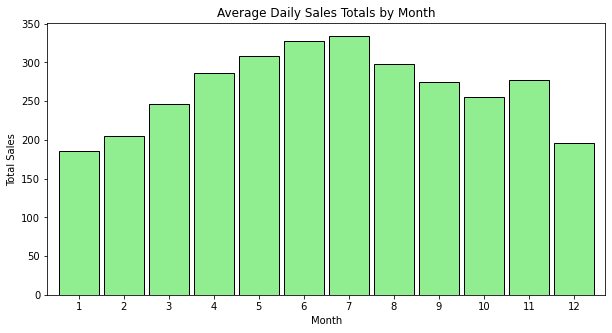

In [142]:
### Explore sale_amount by month
plt.figure(figsize=(10, 5))
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, color = 'lightgreen', ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Daily Sales Totals by Month', xlabel='Month', ylabel='Total Sales')
plt.show()

#### Takeaways on Total Sales by Month:
- highest sales in May, June, July
- lower sales in Jan, Feb, Dec

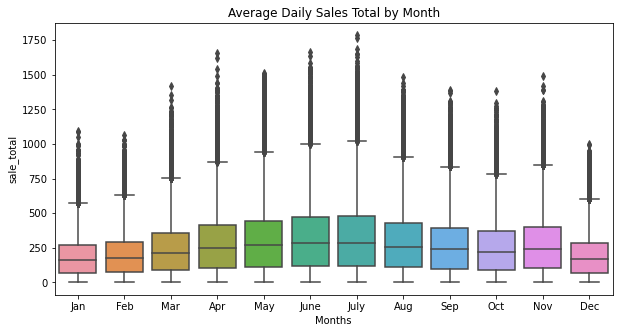

In [143]:
plt.figure(figsize=(10, 5))
g = sns.boxplot(data = train, x = 'month', y = 'sale_total')
plt.title('Average Daily Sales Total by Month')
g.set(xticklabels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Months')
plt.show()

#### Takeaways on Total Sales by Month:
- highest variability in  June, July
- lowest average sales in Jan, Feb, Dec

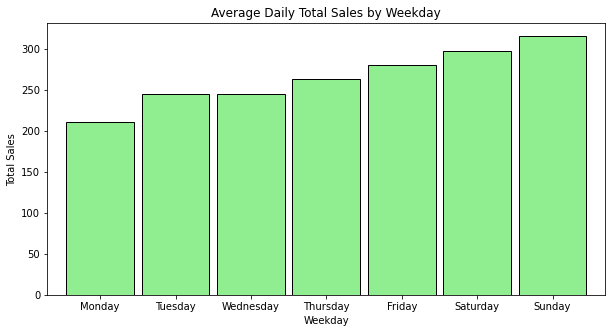

In [144]:
### Explore sale_amount by weekday
plt.figure(figsize=(10, 5))
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = y.groupby(y.index.day_name()).mean().reindex(cats).plot.bar(width=.9, color = 'lightgreen', ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Daily Total Sales by Weekday', xlabel='Weekday', ylabel='Total Sales')
plt.show()

#### Takeaways:
- lowest sales day is Monday
- sales higher on Friday, Saturday, Sunday

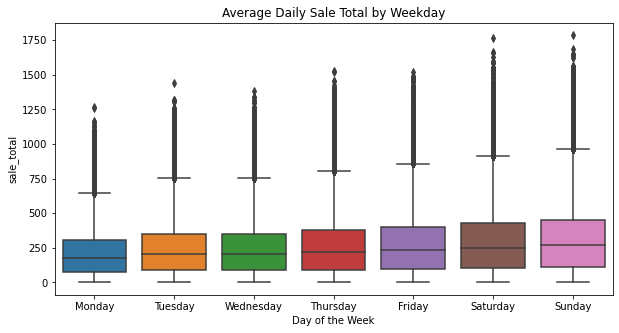

In [145]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = train, x = 'day_of_week', y = 'sale_total', order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] )
plt.title('Average Daily Sale Total by Weekday')
plt.xlabel('Day of the Week')
plt.show()

#### Takeaways: 
- most variability on Sat and Sun
- lowest average sale on Mondays

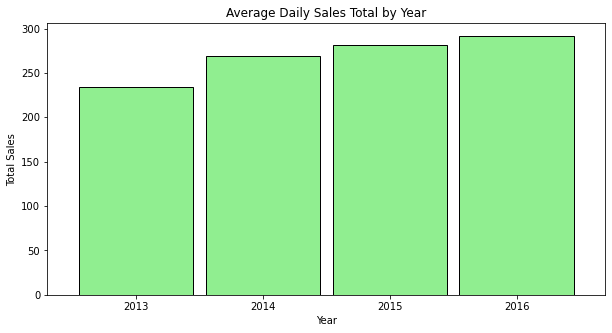

In [148]:
### Explore sale_amount by year
plt.figure(figsize=(10, 5))
ax = y.groupby(y.index.year).mean().plot.bar(width=.9, color = 'lightgreen', ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Daily Sales Total by Year', xlabel='Year', ylabel='Total Sales')
plt.show()

#### Takeaways:
- average daily sales totals increasing each year

### Visualize target over time

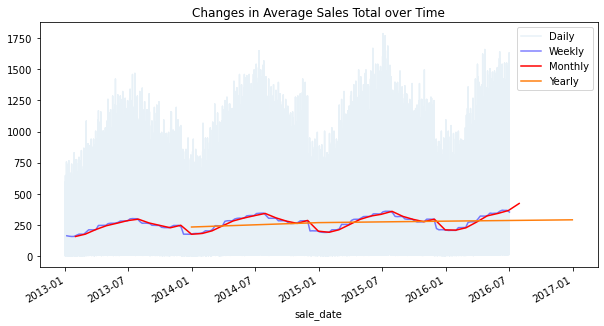

In [151]:
# Visualize target over time - daily, weekly, monthly, yearly
plt.figure(figsize=(10, 5))
plt.title('Changes in Average Sales Total over Time')
y.plot(alpha=.1, label='Daily')
y.resample('W').mean().plot(alpha=.5, label='Weekly', color = 'blue')
y.resample('M').mean().plot(label='Monthly', color = 'red')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()

### Calculate Moving Averages

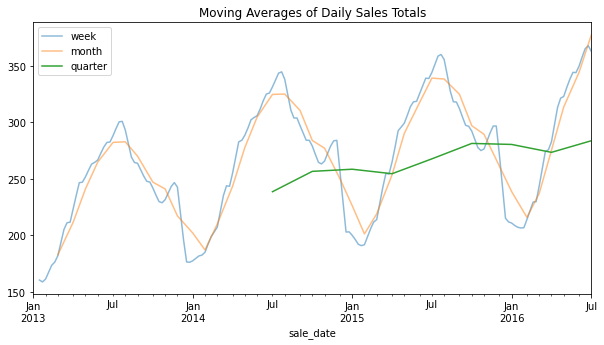

In [152]:
# Use .rolling.mean to Calculate Moving Averages by  week, month, quarter
plt.figure(figsize=(10, 5))
y.resample('W').mean().rolling(3).mean().plot(alpha=.5, label='week')
y.resample('M').mean().rolling(3).mean().plot(alpha=.5, label='month')
y.resample('3M').mean().rolling(7).mean().plot(alpha=8, label='quarter')
plt.title('Moving Averages of Daily Sales Totals')
plt.legend()
plt.show()

### Visualize Change Over Time

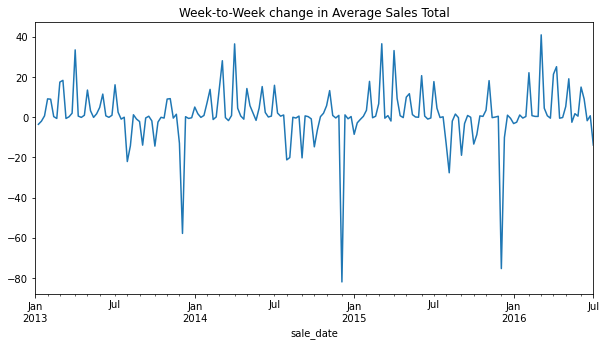

In [153]:
#Use .diff method to plot changes over time
plt.figure(figsize=(10, 5))
y.resample('W').mean().diff().plot(title='Week-to-Week change in Average Sales Total')
plt.show()

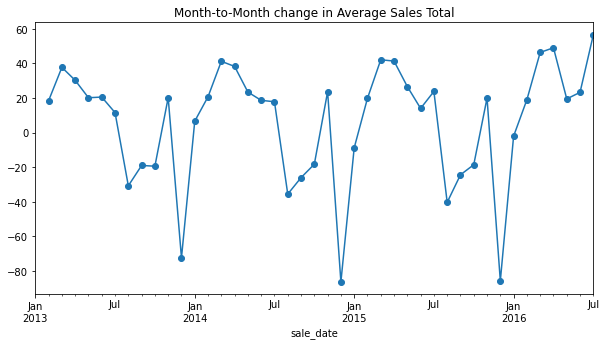

In [154]:
#Use .diff method to plot changes over time
plt.figure(figsize=(10, 5))
y.resample('M').mean().diff().plot(title='Month-to-Month change in Average Sales Total', marker = 'o')
plt.show()

### Takeaways:
- last week of the year, sales really drop
- big decrease in sales in December
- big increase jan through peak in March

### Seasonal Visualizations

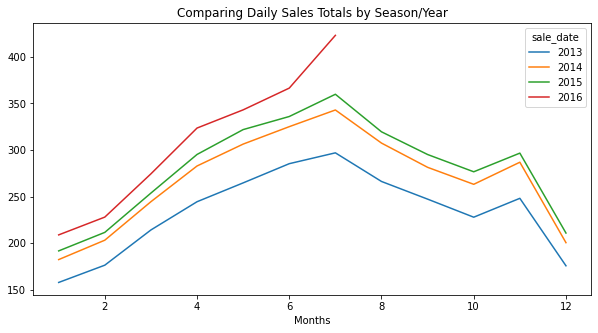

In [155]:
# use .groupby and .unstack (turns an index level into columns) to plot multiple years and compare seasons
plt.rc('figure', figsize=(10,5))  
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.title('Comparing Daily Sales Totals by Season/Year')
plt.xlabel('Months')
plt.show()

#### Takeaways:
- Sales peak in summer, dip in winter
- Seasonality consistent from year to year
- increases seen each consecutive year

### Seasonal Subseries Plot

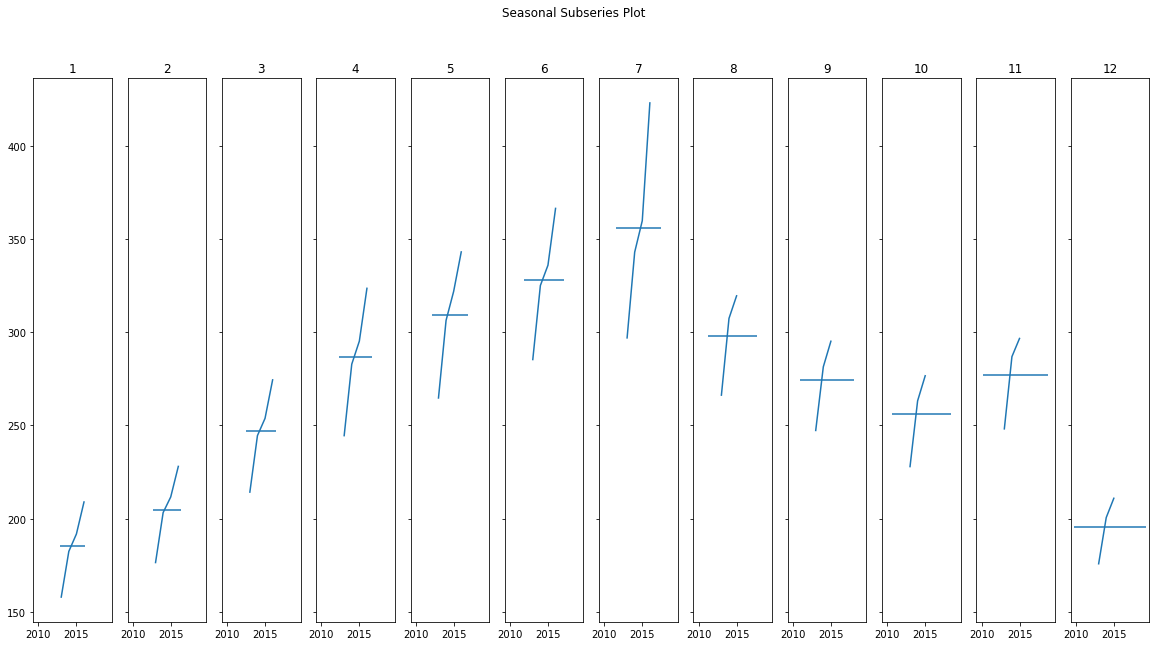

In [156]:
#= plot by season/year

table = y.groupby([y.index.year, y.index.month]).mean().unstack()
plt.rc('figure', figsize=(20, 10))
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
plt.show()

### Lag Plot

A lag plot is a scatter plot of a series with itself, shifted, or lagged. Put another way, a lag plot measures one value against the next or previous value.

Text(0.5, 1.0, 'Lag plot with lag=1 day')

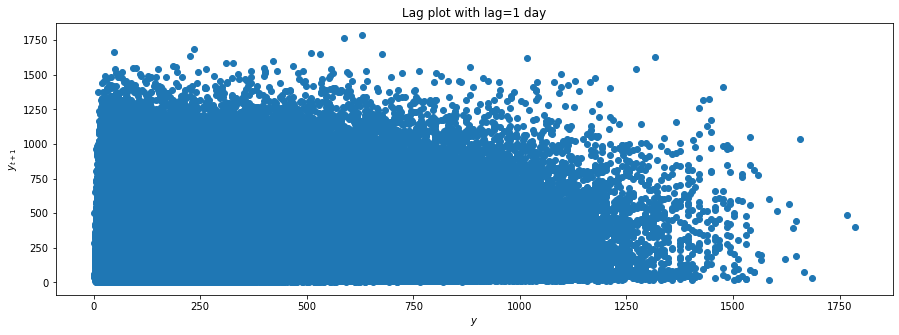

In [161]:
# lag equals 1. day
plt.rc('figure', figsize=(15, 5))    #rc = run commands, control several settings in one command
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1 day')

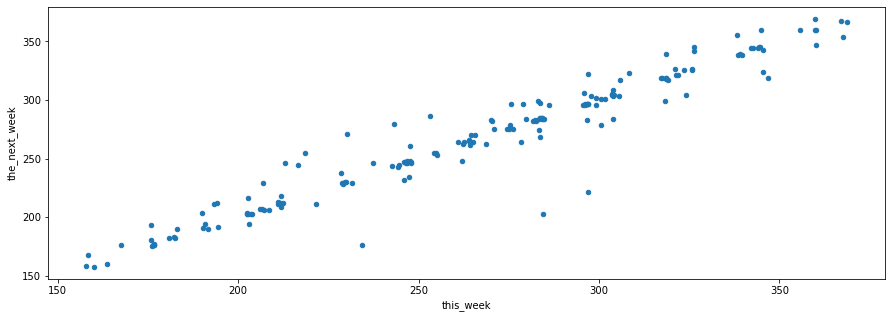

In [162]:
# lag = 1 week
plt.rc('figure', figsize=(15, 5)) 
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sale_total.shift(-1)
weekly = weekly.rename(columns={'sale_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly
plt.show()

### Autocorrelation Plot

##### Autocorrelation is a measure of the linear relationship between lagged values of a time series. An autocorrelation plot shows the correlation coefficient as a function of lag time.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

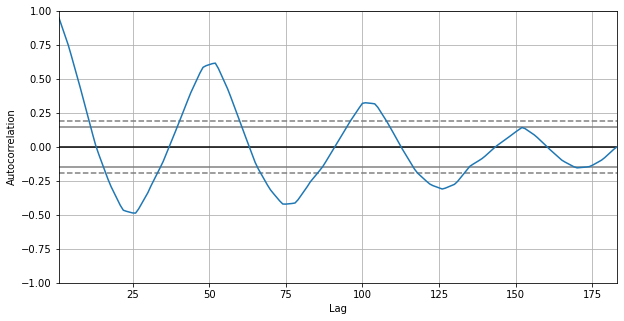

In [159]:
#plot autocorrelation
plt.rc('figure', figsize=(10, 5))  
pd.plotting.autocorrelation_plot(train.sale_total.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

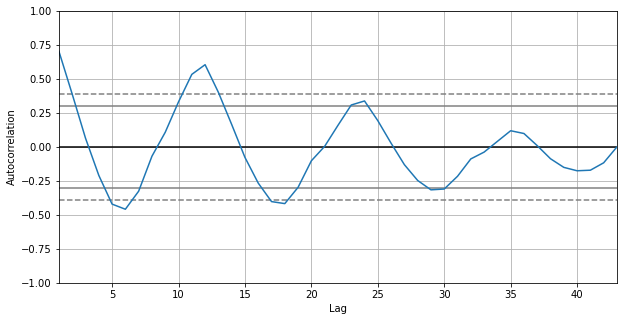

In [160]:
#plot autocorrelation
plt.rc('figure', figsize=(10, 5))  
pd.plotting.autocorrelation_plot(train.sale_total.resample('M').mean())

### Seasonal Decomposition

Seasonal decomposition is a fancy way to say that we can model time series as having 3 seperate components, the seasonal repeated cycle, the long term trend, and random noise1. There are two types of seasonal decomposition models, additive and multiplicative.

In [108]:
y = train.sale_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,163.589167,NaN,-77.817427,NaN
2013-01-13 00:00:00+00:00,159.981203,NaN,-76.420498,NaN
2013-01-20 00:00:00+00:00,157.946720,NaN,-77.661680,NaN
2013-01-27 00:00:00+00:00,158.545383,NaN,-77.653889,NaN
2013-02-03 00:00:00+00:00,167.585014,NaN,-73.077372,NaN


<AxesSubplot:xlabel='sale_date'>

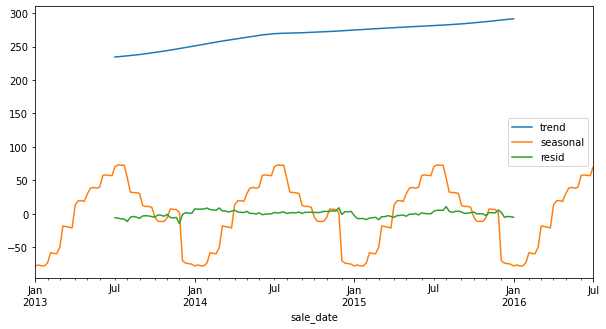

In [109]:
plt.rc('figure', figsize=(10, 5))  
decomposition.iloc[:, 1:].plot()

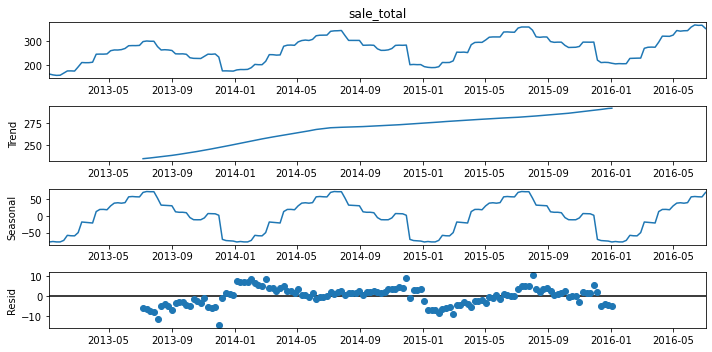

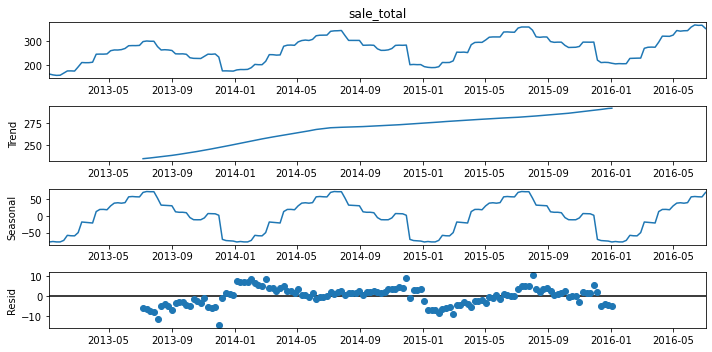

In [110]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()

### Categories Over Time

In [163]:
# plot to see how binned sale totals change over time

train = train.resample('D').mean()
# create a categorical feature
train['sale_total_bin'] = pd.qcut(train.sale_total, 3, labels=['low', 'avg', 'high'])
train.groupby('sale_total_bin').mean()

,sale_amount,sale_id,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,sale_total,month
sale_total_bin,,,,,,,,,,
low,36.404993,456092.714286,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,195.743931,5.126464
avg,49.054831,456213.086854,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,263.746919,6.615023
high,62.880920,456363.897981,5.500446,78224.808075,25.499319,5.160884,2.384536e+11,2.384536e+11,338.110364,6.549296


Text(0, 0.5, '% of days in the month')

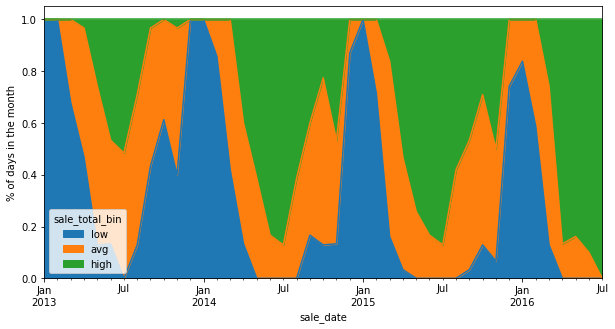

In [168]:
#plotting the change
plt.rc('figure', figsize=(10, 5)) 
(train.groupby('sale_total_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')


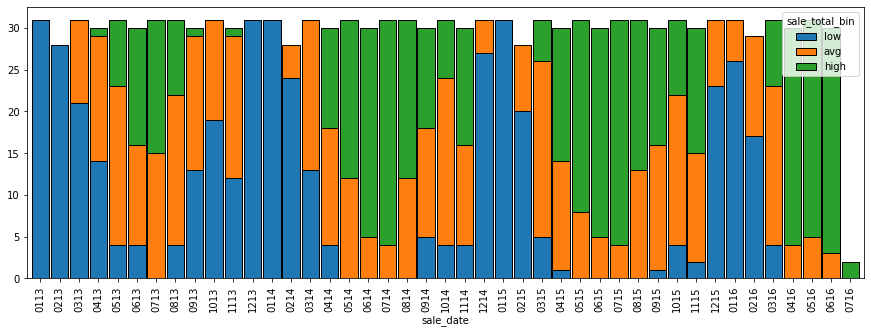

In [172]:
# plot same in bar plot form 

plt.rc('figure', figsize=(15, 5))  

ax = (train
 .groupby('sale_total_bin')
 .resample('m')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%m%y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.show()

# Explore OPS

In [114]:
import prepare
import acquire

In [174]:
ops = acquire.get_ops()
ops.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [175]:
ops = prepare.prep_ops(ops)
ops.head()

,Consumption,Wind,Solar,Wind+Solar,Month,Year,Weekday
Date,,,,,,,
2006-01-01,1069.184,1.0,1.0,2.0,1.0,2006.0,6.0
2006-01-02,1380.521,1.0,1.0,2.0,1.0,2006.0,0.0
2006-01-03,1442.533,1.0,1.0,2.0,1.0,2006.0,1.0
2006-01-04,1457.217,1.0,1.0,2.0,1.0,2006.0,2.0
2006-01-05,1477.131,1.0,1.0,2.0,1.0,2006.0,3.0


In [176]:
#Splitting the data - 70% to train 
train_size = .70

# find n, the number of rows in df
n = ops.shape[0]
test_start_index = round(train_size * n)

#splitting first 70% to train, remainder to test
train = ops[:test_start_index] # everything up (not including) to the test_start_index
test = ops[test_start_index:] # everything from the test_start_index to the end

train.shape, test.shape

((3068, 7), (1315, 7))

In [177]:
train.head(2)

,Consumption,Wind,Solar,Wind+Solar,Month,Year,Weekday
Date,,,,,,,
2006-01-01,1069.184,1.0,1.0,2.0,1.0,2006.0,6.0
2006-01-02,1380.521,1.0,1.0,2.0,1.0,2006.0,0.0


In [178]:
# split target to y (y-train)
y = train.Consumption
y.head(2)

Date
2006-01-01    1069.184
2006-01-02    1380.521
Name: Consumption, dtype: float64

### Check distribution of target variable (consumption) and independent variables

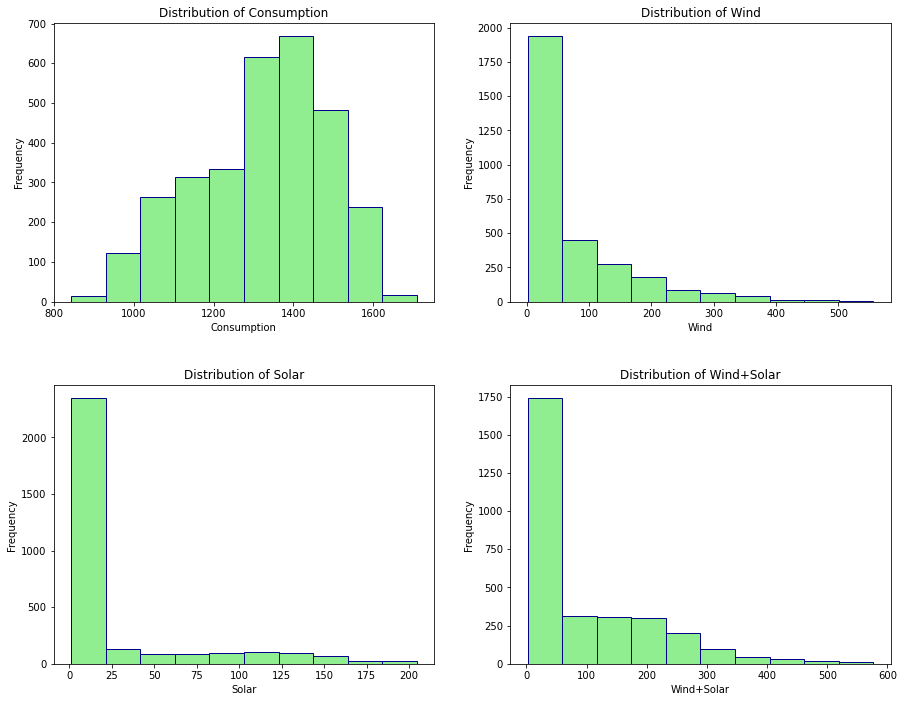

In [179]:
#look at distribution of our all variables
prepare.plot_dist(train)

#### Takeaways
- majority of consumption levels is ~1300-1500<br>
- target variable is left skewed
- all predictors are right skewed

### Explore Consumption on Different Components of Time

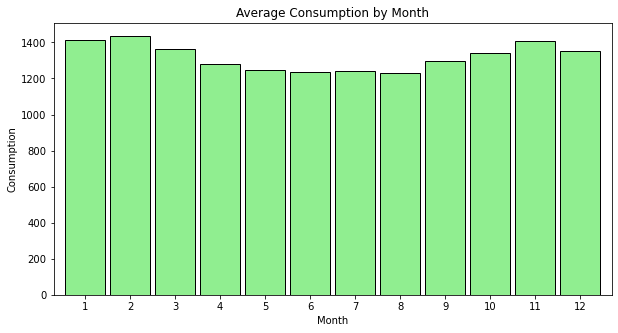

In [180]:
### Explore Consumption by month
plt.figure(figsize=(10, 5))
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, color = 'lightgreen', ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Month', xlabel='Month', ylabel='Consumption')
plt.show()

# Takeaway:
- peak months - november - march (especially  november and february)
- lower consumption in summer months of may-august

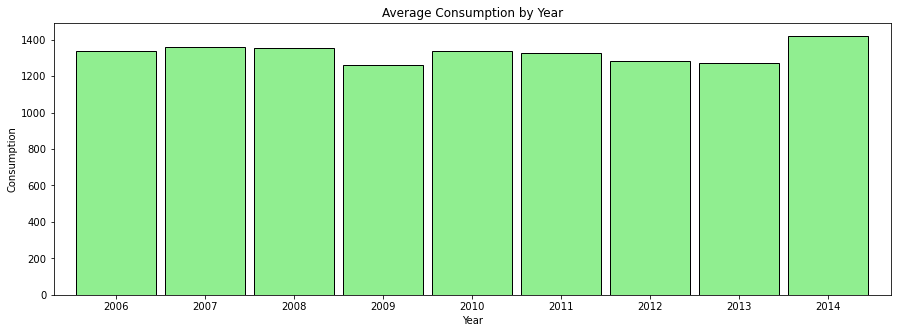

In [181]:
### Explore consumption by year
ax = y.groupby(y.index.year).mean().plot.bar(width=.9, color = 'lightgreen', ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Year', xlabel='Year', ylabel='Consumption')
plt.show()

#### Takeaways:
- fairly even consumption over the years
- highest consumption in most recent year reported (2014)

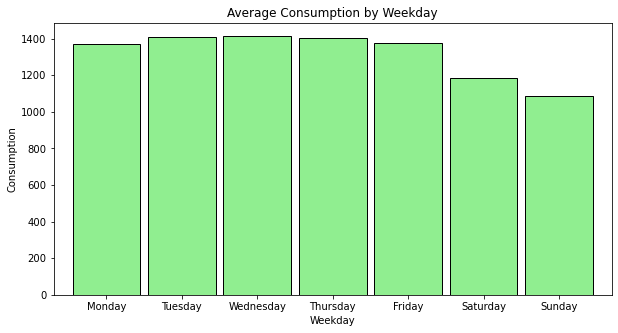

In [182]:
### Explore sale_amount by weekday
plt.figure(figsize=(10, 5))
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = y.groupby(y.index.day_name()).mean().reindex(cats).plot.bar(width=.9, color = 'lightgreen', ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Weekday', xlabel='Weekday', ylabel='Consumption')
plt.show()

#### Takeaways:
- lowest consumption on Saturday and Sunday
- consumption higher in midweek (tuesday-thursday)

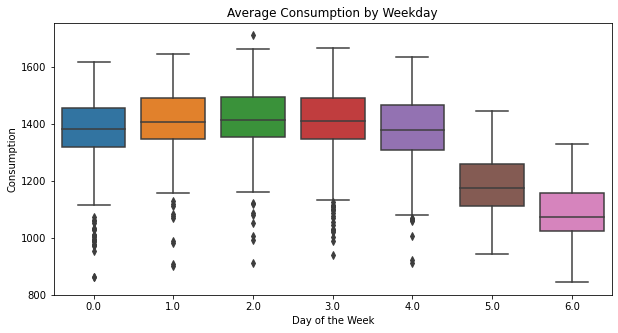

In [183]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = train, x = 'Weekday', y = 'Consumption')
plt.title('Average Consumption by Weekday')
plt.xlabel('Day of the Week')
plt.show()

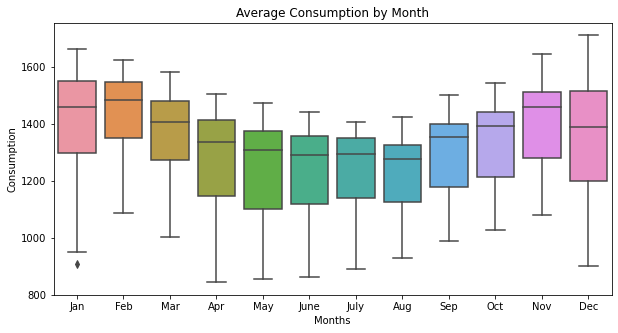

In [184]:
plt.figure(figsize=(10, 5))
g = sns.boxplot(data = train, x = 'Month', y = 'Consumption')
plt.title('Average Consumption by Month')
g.set(xticklabels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Months')
plt.show()

### Visualize target over time

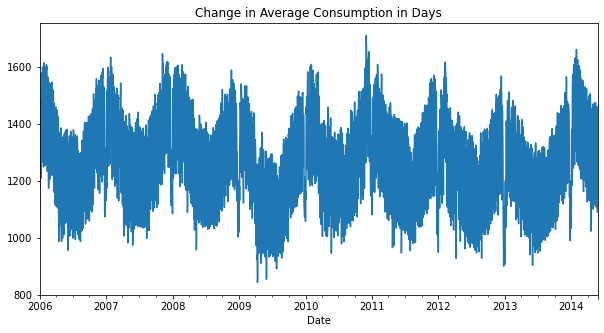

In [185]:
# Visualize target over time - days
plt.figure(figsize=(10, 5))
plt.title('Change in Average Consumption in Days')
y.plot()
plt.show()

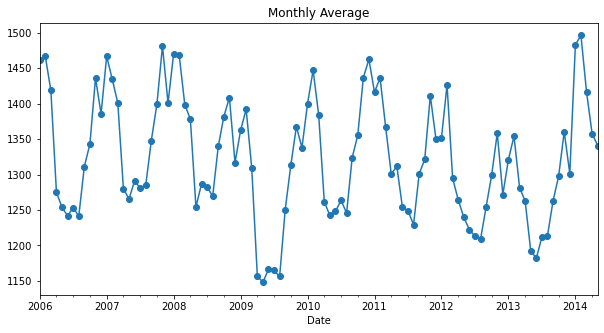

In [186]:
# Visualize target over time - months
plt.figure(figsize=(10, 5))
plt.title('Change in Average Consumption in Months')
y.resample('M').mean().plot(title='Monthly Average', marker = 'o')
plt.show()

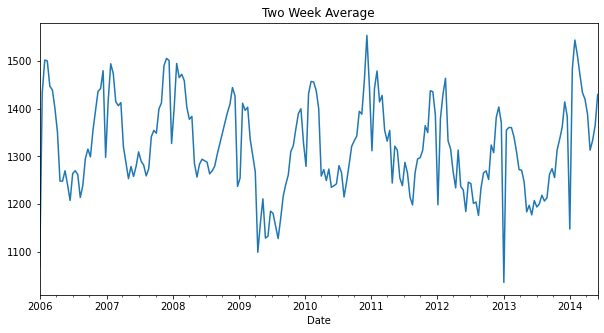

In [187]:
# Visualize target over time - weeks
plt.figure(figsize=(10, 5))
plt.title('Change in Two Week Average Consumption')
y.resample('2W').mean().plot(title='Two Week Average')
plt.show()

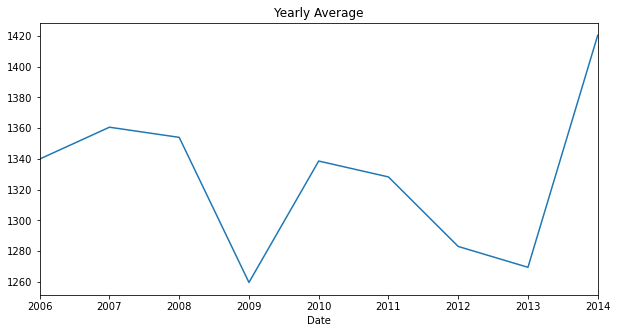

In [188]:
# Visualize target over time - years
plt.figure(figsize=(10, 5))
plt.title('Change in Average Consumption by Years')
y.resample('Y').mean().plot(title='Yearly Average')
plt.show()

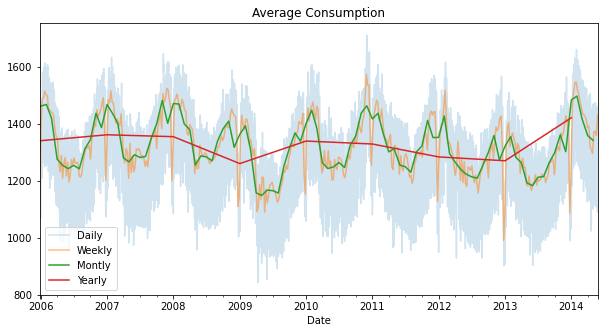

In [189]:
# Combined Visualization
plt.figure(figsize=(10, 5))
y.plot(alpha=.2, label='Daily')
y.resample('W').mean().plot(alpha=.5, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.title('Average Consumption')
plt.legend()
plt.show()

### Calculate Moving Averages

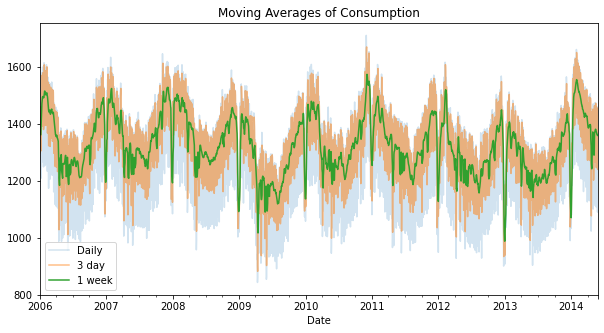

In [190]:
# Use .rolling.mean to Calculate Moving Averages by  day, 3-day, week
plt.figure(figsize=(10, 5))
y.plot(alpha=.2, label='Daily')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.title('Moving Averages of Consumption')
plt.legend()
plt.show()

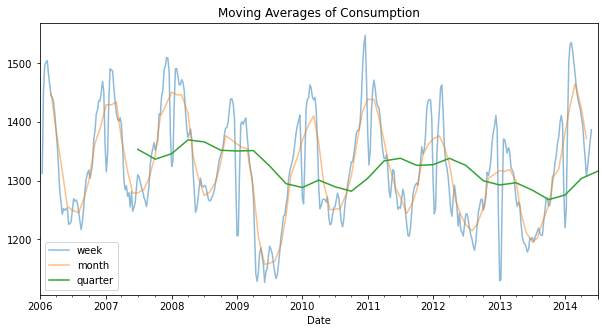

In [191]:
# Use .rolling.mean to Calculate Moving Averages by  week, month, quarter
plt.figure(figsize=(10, 5))
y.resample('W').mean().rolling(3).mean().plot(alpha=.5, label='week')
y.resample('M').mean().rolling(3).mean().plot(alpha=.5, label='month')
y.resample('3M').mean().rolling(7).mean().plot(alpha=8, label='quarter')
plt.title('Moving Averages of Consumption')
plt.legend()
plt.show()

### Visualize Change Over Time

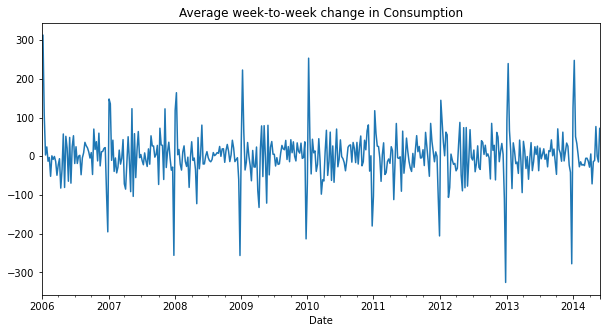

In [192]:
#Use .diff method to plot changes over time
plt.figure(figsize=(10, 5))
y.resample('W').mean().diff().plot(title='Average week-to-week change in Consumption')
plt.show()

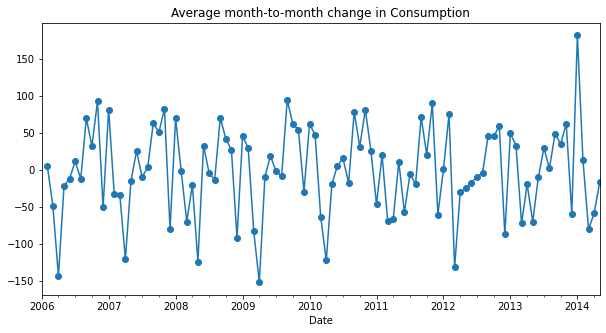

In [193]:
#Use .diff method to plot changes over time
plt.figure(figsize=(10, 5))
y.resample('M').mean().diff().plot(title='Average month-to-month change in Consumption', marker = 'o')
plt.show()

### Takeaways:
- last week of the year, sales really drop
- big decrease in sales in December
- big increase jan through peak in March

### Seasonal Visualizations

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

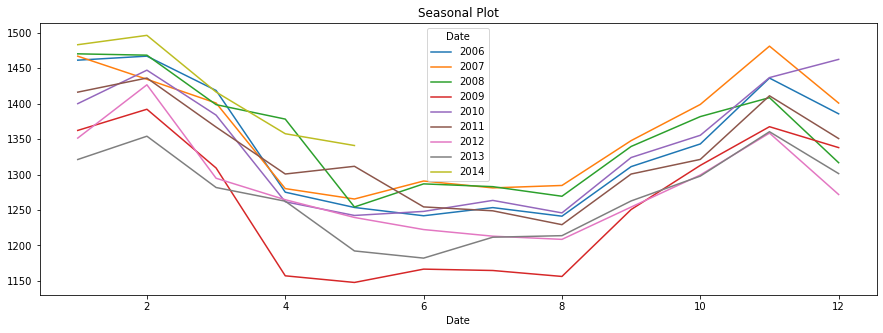

In [194]:
# use .groupby and .unstack (turns an index level into columns) to plot multiple years and compare seasons
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

### Seasonal Subseries Plot

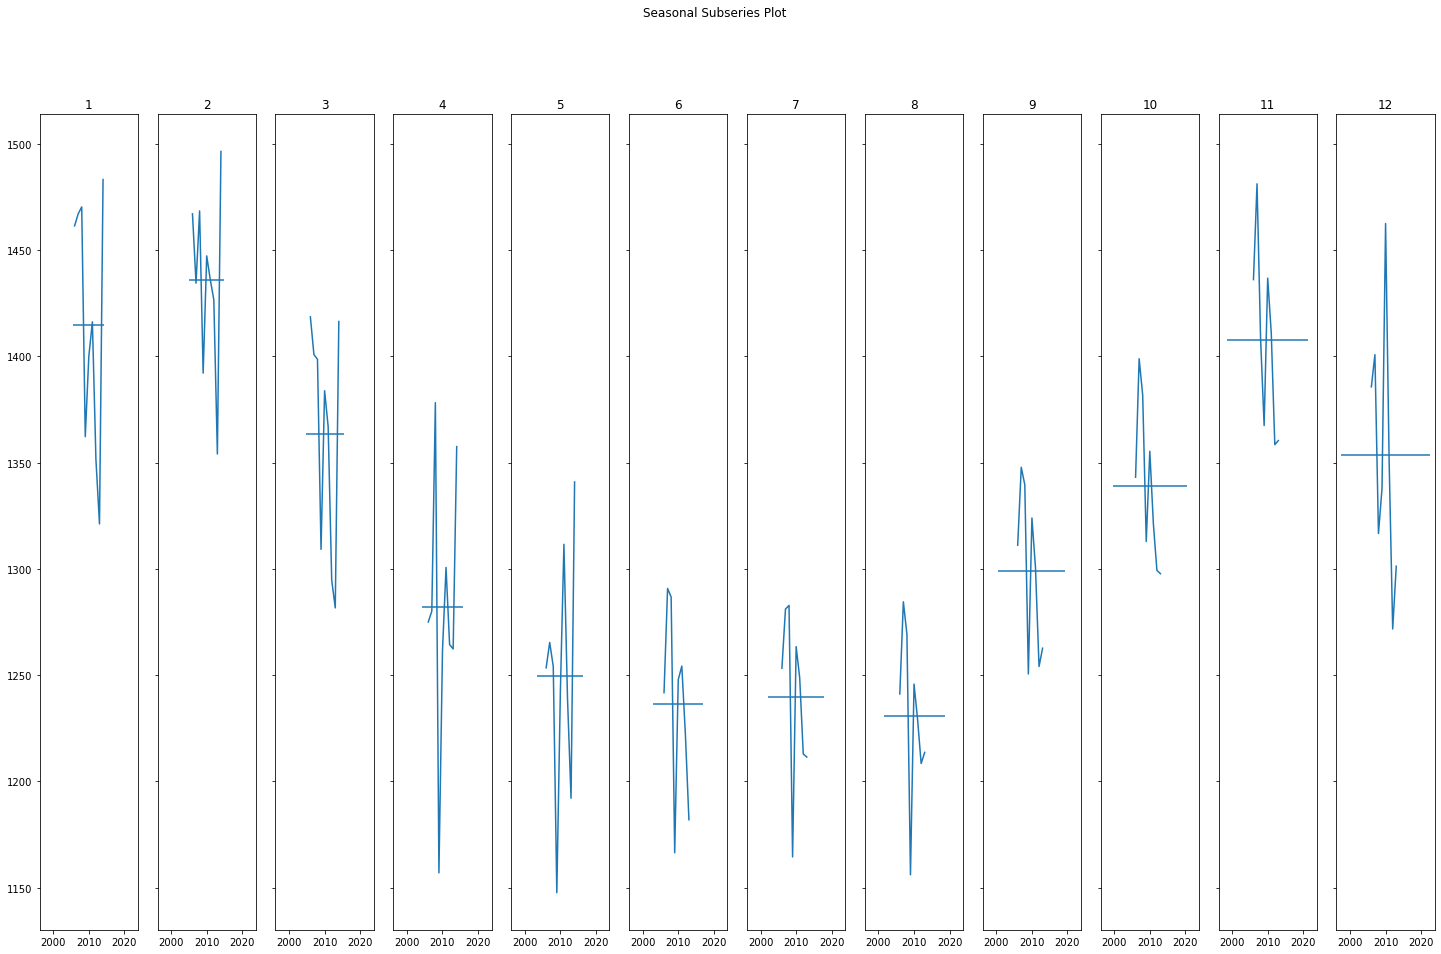

In [195]:
#= plot by season/year

table = y.groupby([y.index.year, y.index.month]).mean().unstack()
plt.rc('figure', figsize=(25, 15))
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
plt.show()

### Lag Plot

A lag plot is a scatter plot of a series with itself, shifted, or lagged. Put another way, a lag plot measures one value against the next or previous value.

Text(0.5, 1.0, 'Lag plot with lag=1 day')

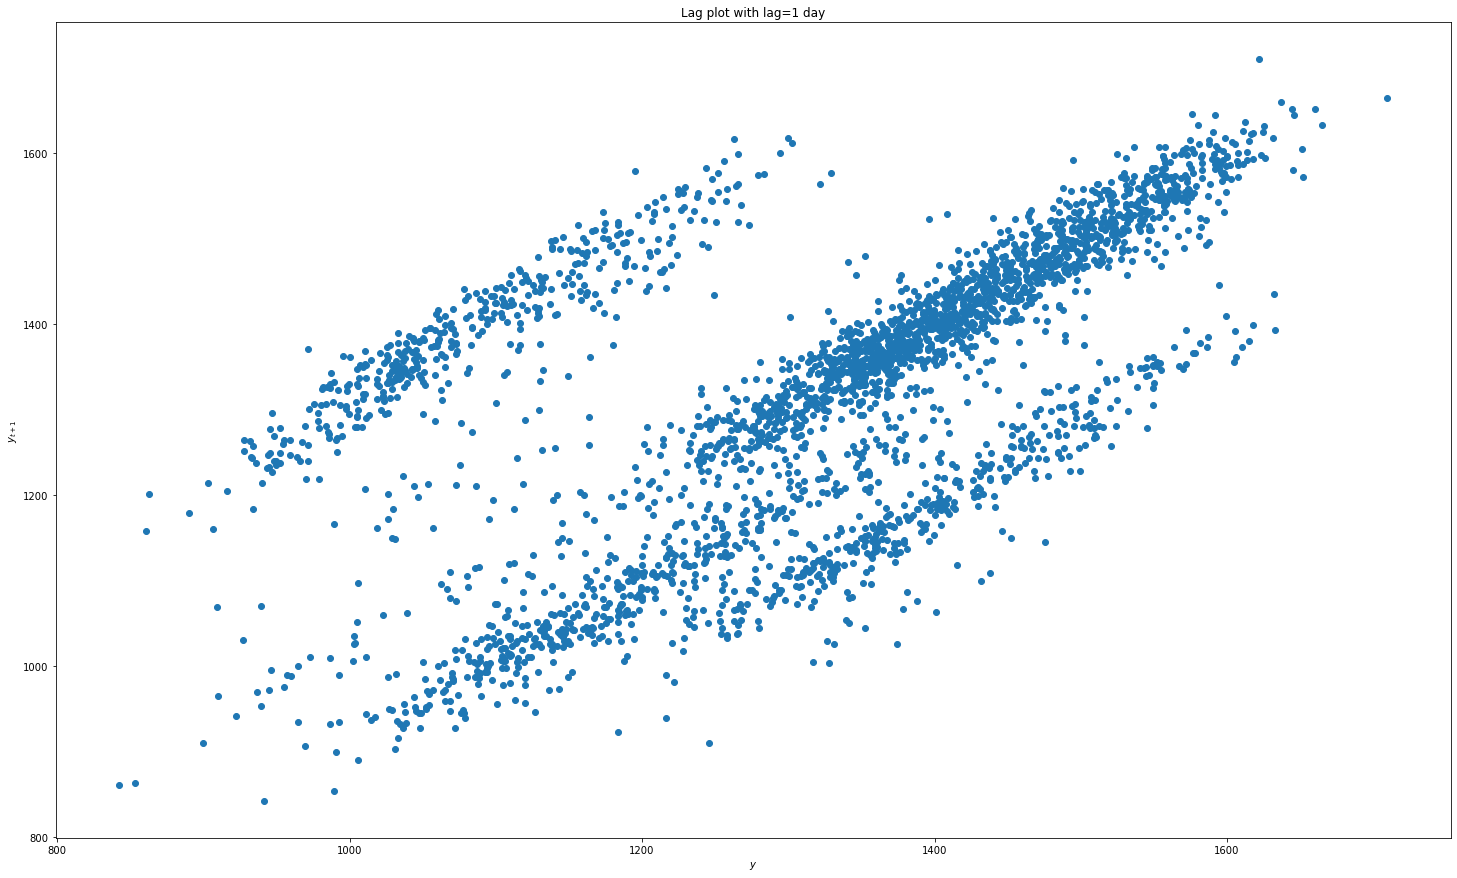

In [196]:
# lag equals 1. day
plt.rc('figure', figsize=(25, 15))    #rc = run commands, control several settings in one command
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1 day')

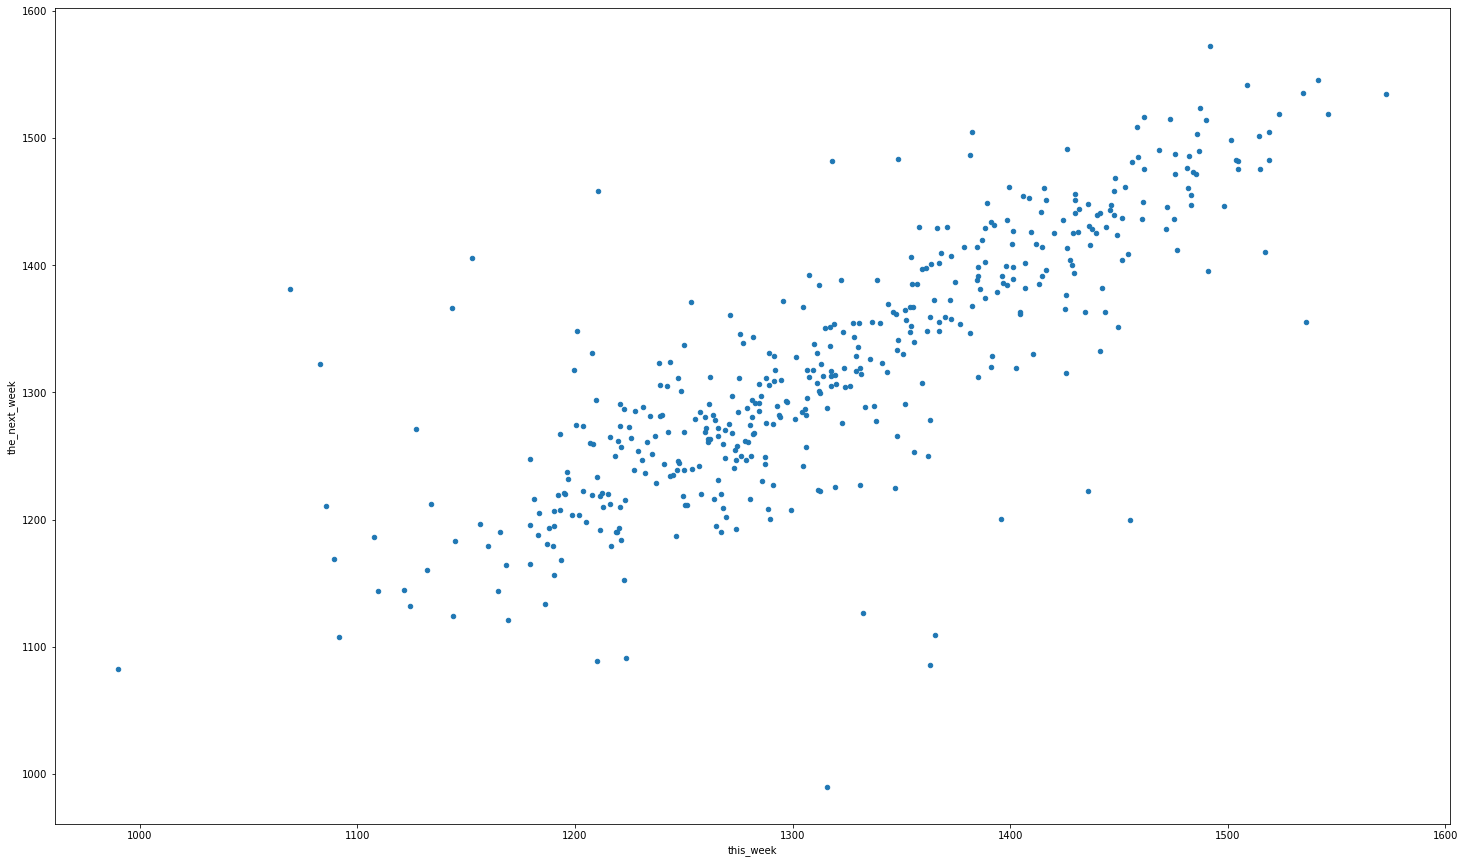

In [197]:
# lag = 1 week
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.Consumption.shift(-1)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly
plt.show()

### Autocorrelation Plot

##### Autocorrelation is a measure of the linear relationship between lagged values of a time series. An autocorrelation plot shows the correlation coefficient as a function of lag time.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

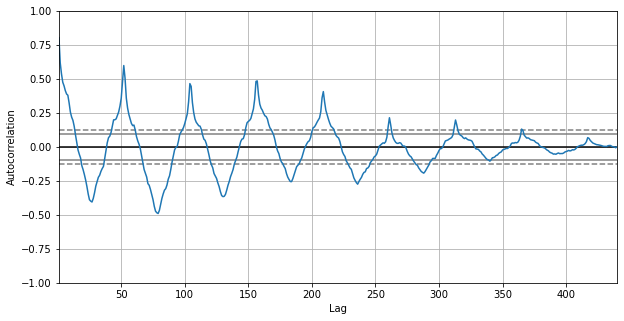

In [198]:
#plot autocorrelation
plt.rc('figure', figsize=(10, 5))  
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

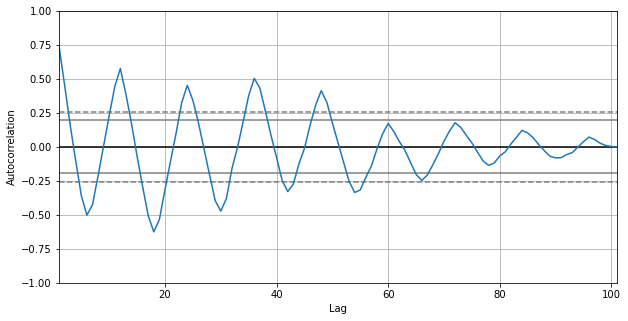

In [199]:
#plot autocorrelation
plt.rc('figure', figsize=(10, 5))  
pd.plotting.autocorrelation_plot(train.Consumption.resample('M').mean())

### Seasonal Decomposition

Seasonal decomposition is a fancy way to say that we can model time series as having 3 seperate components, the seasonal repeated cycle, the long term trend, and random noise1. There are two types of seasonal decomposition models, additive and multiplicative.

In [200]:
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-01,1069.184000,NaN,-68.437315,NaN
2006-01-08,1381.300143,NaN,-125.834756,NaN
2006-01-15,1486.730286,NaN,35.842411,NaN
2006-01-22,1490.031143,NaN,106.451350,NaN
2006-01-29,1514.176857,NaN,122.022124,NaN


<AxesSubplot:xlabel='Date'>

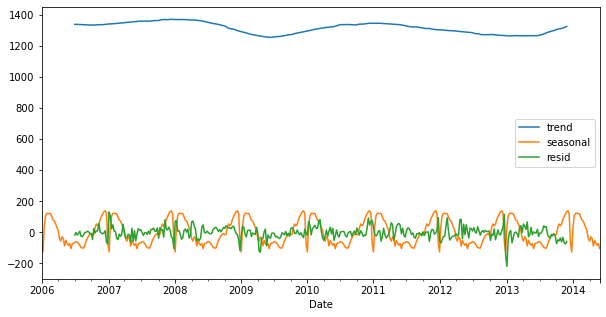

In [201]:
plt.rc('figure', figsize=(10, 5))  
decomposition.iloc[:, 1:].plot()

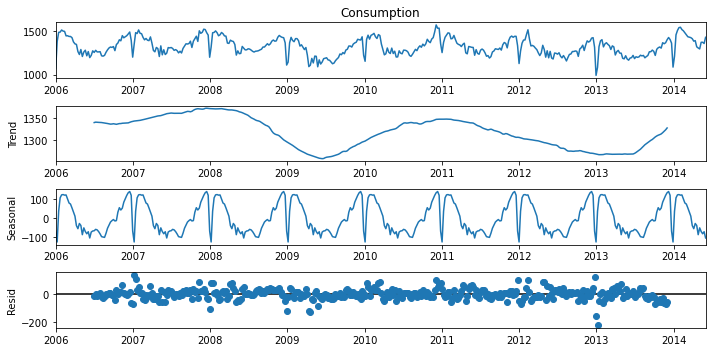

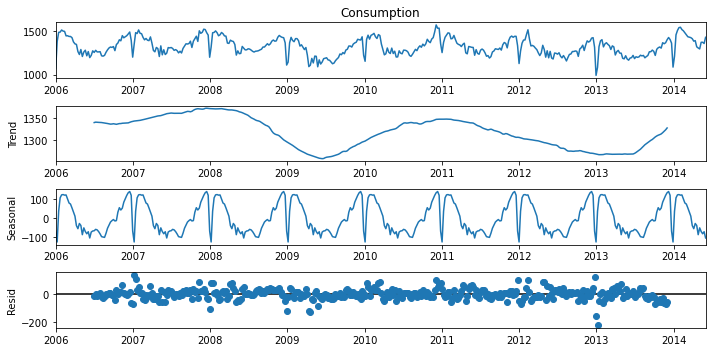

In [202]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()

### Categories Over Time

In [203]:
# plot to see how binned sale totals change over time

train = train.resample('M').mean()
# create a categorical feature
train['consumption_bin'] = pd.qcut(train.Consumption, 3, labels=['low', 'avg', 'high'])
train.groupby('consumption_bin').mean()

,Consumption,Wind,Solar,Wind+Solar,Month,Year,Weekday
consumption_bin,,,,,,,
low,1229.767362,59.802529,46.577843,106.380372,6.588235,2010.176471,3.000854
avg,1315.851420,81.956554,24.321484,106.278038,7.181818,2009.939394,3.002910
high,1421.324499,60.800382,11.785046,72.585427,5.235294,2009.058824,2.997059


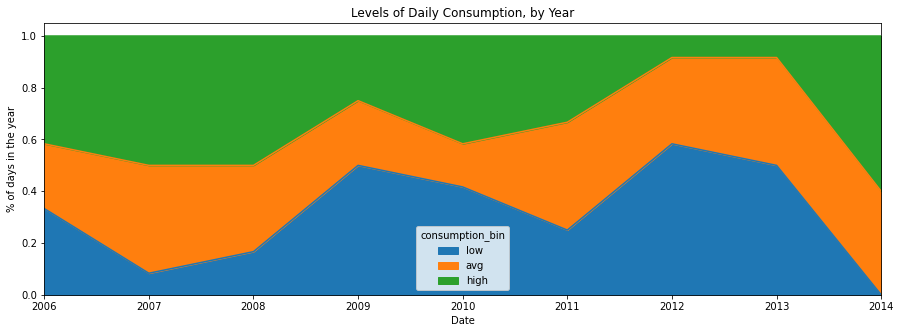

In [214]:
#plotting the change
plt.rc('figure', figsize=(10, 5))  
(train.groupby('consumption_bin')
 .resample('y')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the year')
plt.title('Levels of Daily Consumption, by Year')
plt.show()


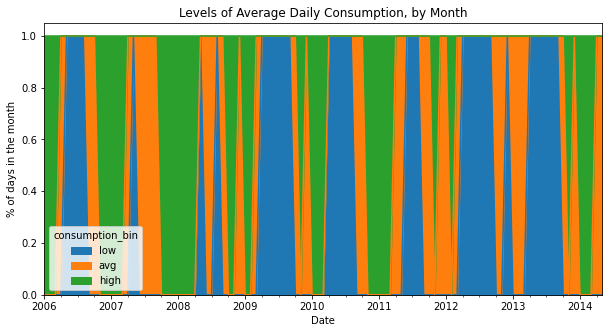

In [216]:
#plotting the change
plt.rc('figure', figsize=(10, 5))  
(train.groupby('consumption_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')
plt.title('Levels of Average Daily Consumption, by Month')
plt.show()



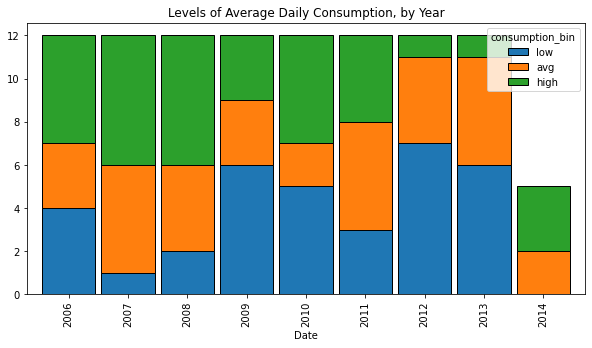

In [215]:
# plot same in bar plot form 

plt.rc('figure', figsize=(10, 5))  

ax = (train
 .groupby('consumption_bin')
 .resample('Y')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.title('Levels of Average Daily Consumption, by Year')
plt.show()
